#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
# Display the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [4]:
# Display the data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [7]:
# Use 'TotalPay' as the salary column
salary_column = 'TotalPay'

# Calculate basic statistics
mean_salary = df[salary_column].mean()
median_salary = df[salary_column].median()
mode_salary = df[salary_column].mode().iloc[0]
min_salary = df[salary_column].min()
max_salary = df[salary_column].max()
salary_range = max_salary - min_salary
std_dev_salary = df[salary_column].std()

In [8]:
# Display the results
print(f"Mean {salary_column}: {mean_salary}")
print(f"Median {salary_column}: {median_salary}")
print(f"Mode {salary_column}: {mode_salary}")
print(f"Minimum {salary_column}: {min_salary}")
print(f"Maximum {salary_column}: {max_salary}")
print(f"{salary_column} Range: {salary_range}")
print(f"Standard Deviation of {salary_column}: {std_dev_salary}")

Mean TotalPay: 74768.32197169267
Median TotalPay: 71426.60999999999
Mode TotalPay: 0.0
Minimum TotalPay: -618.13
Maximum TotalPay: 567595.43
TotalPay Range: 568213.56
Standard Deviation of TotalPay: 50517.00527394987


Since the missing values are relatively small in these columns (609 in 'BasePay', 4 in 'OvertimePay', and 4 in 'OtherPay'), i use the mean imputation ,This method helps to preserve the overall distribution of the data.


In [9]:
# Impute missing values in numeric columns with mean
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)


Both 'Notes' and 'Status' columns have a large number of missing values (148654). Since the missing values are extensive

In [10]:
# Drop 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)


The 'Benefits' column has a significant number of missing values (36163),iam using a more sophisticated imputation method, such as machine learning-based imputation

In [11]:
from sklearn.impute import KNNImputer

# Create KNN imputer and fit-transform the 'Benefits' column
imputer = KNNImputer(n_neighbors=5)
df['Benefits'] = imputer.fit_transform(df[['Benefits']])


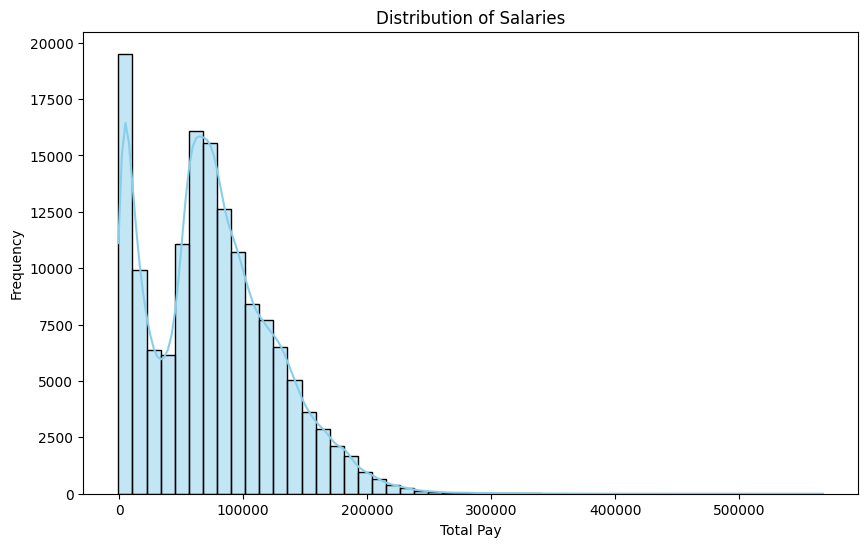

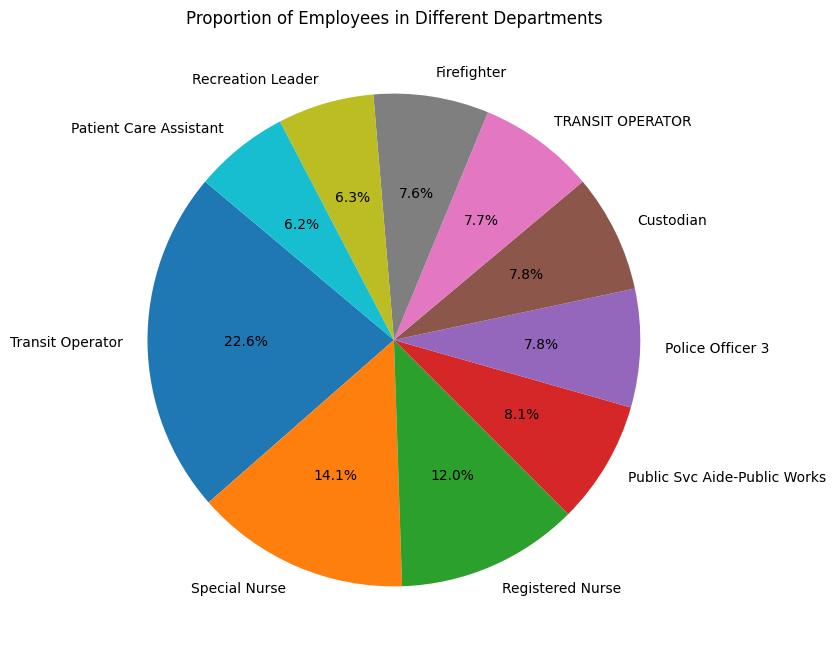

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)  # Displaying the top 10 departments for clarity
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [13]:
# Group the data by 'JobTitle' and calculate summary statistics
grouped_data = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max'])

# Display the summary statistics for each group
print(grouped_data)

                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                      83  44035.664337   
ACCOUNTANT                                          5  47429.268000   
ACCOUNTANT INTERN                                  48  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                         1  62290.780000   
ACUPUNCTURIST                                       1  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                              26  52705.880385   
X-Ray Laboratory Aide                             100  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1  53632.870000   
Youth Comm Advisor                                  4  41414.307500   
ZOO CURATOR                                         1  66686.560000   

                                                   median       min       ma

In [14]:
# Sort the grouped data by mean salary in descending order
sorted_data = grouped_data.sort_values(by='mean', ascending=False)

# Display the sorted data
print(sorted_data)


                                                count           mean  \
JobTitle                                                               
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY      2  399211.275000   
Chief Investment Officer                            1  339653.700000   
Chief of Police                                     3  329183.646667   
Chief, Fire Department                              3  325971.683333   
DEPUTY DIRECTOR OF INVESTMENTS                      1  307899.460000   
...                                               ...            ...   
Commissioner 16.700c, No Pay                       50      25.760000   
IS Technician Assistant                             1       0.000000   
Not provided                                        4       0.000000   
Public Safety Comm Tech                             1       0.000000   
Drug Court Coordinator                              1       0.000000   

                                                    median     

Correlation between TotalPay and BasePay: 0.9505142922626454


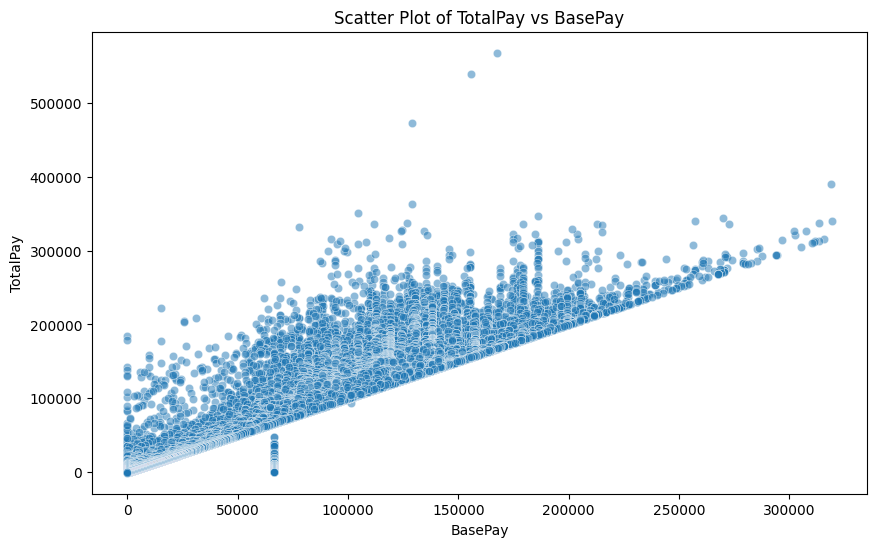

In [15]:
# Identify correlation between 'TotalPay' and 'BasePay'
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
plt.title('Scatter Plot of TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

1. Overview:

The dataset consists of information about employee salaries, including columns such as 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', and 'Status'.
Missing Values: Missing values were identified in columns such as 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Notes', and 'Status'.

2. Handling Missing Values:

For numeric columns with a small number of missing values ('BasePay', 'OvertimePay', 'OtherPay'), mean imputation was used to fill the gaps.
For the 'Benefits' column with a significant number of missing values, a machine learning-based imputation method (K-Nearest Neighbors) was applied to preserve the overall distribution.
Columns with a large number of missing values ('Notes' and 'Status') were dropped from the analysis.

3. Exploratory Data Analysis (EDA):

Histogram: A histogram was created to visualize the distribution of salaries ('TotalPay'). The histogram showed that salaries are concentrated within specific ranges, with a right-skewed distribution.
Pie Chart: A pie chart represented the proportion of employees in different job titles ('JobTitle'). The top 10 job titles were considered for clarity in the visualization.

4. Grouping and Summary Statistics:

The data was grouped by 'JobTitle', and summary statistics (count, mean, median, min, max) for 'TotalPay' were calculated for each group. The results provided insights into salary distribution across different job titles.

5. Correlation Analysis:

Correlation between 'TotalPay' and 'BasePay' was calculated, revealing the strength and direction of their linear relationship.
A scatter plot was generated to visualize the relationship between 'TotalPay' and 'BasePay'. The scatter plot showed the distribution of data points and highlighted any potential patterns.



# Good Luck!